In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

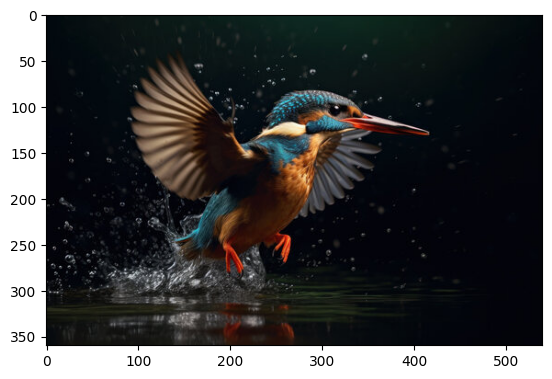

In [4]:
img_bgr = cv2.imread('bird.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Text(0.5, 1.0, 'Brighter')

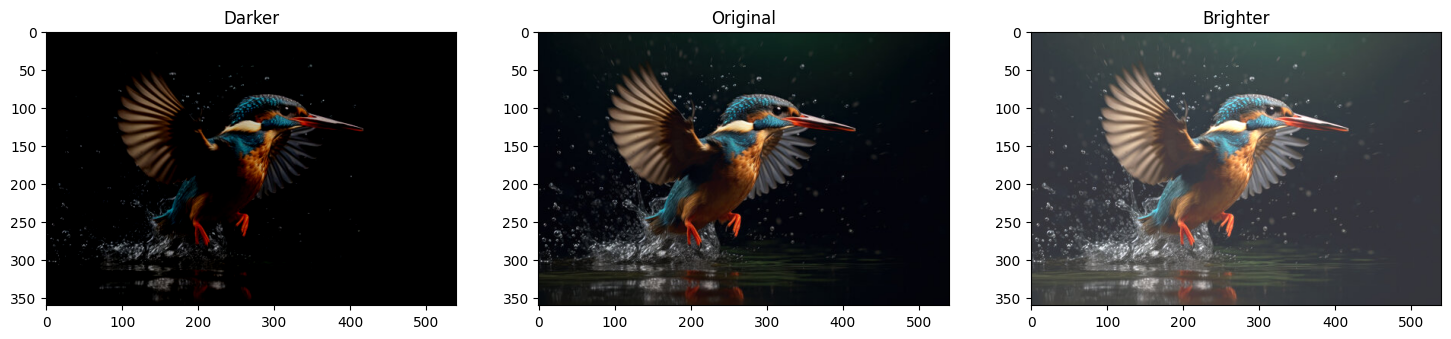

In [7]:
matrix = np.ones(img_rgb.shape, dtype='uint8') * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Darker")
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original")
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Brighter")

Text(0.5, 1.0, 'Higher Contrast')

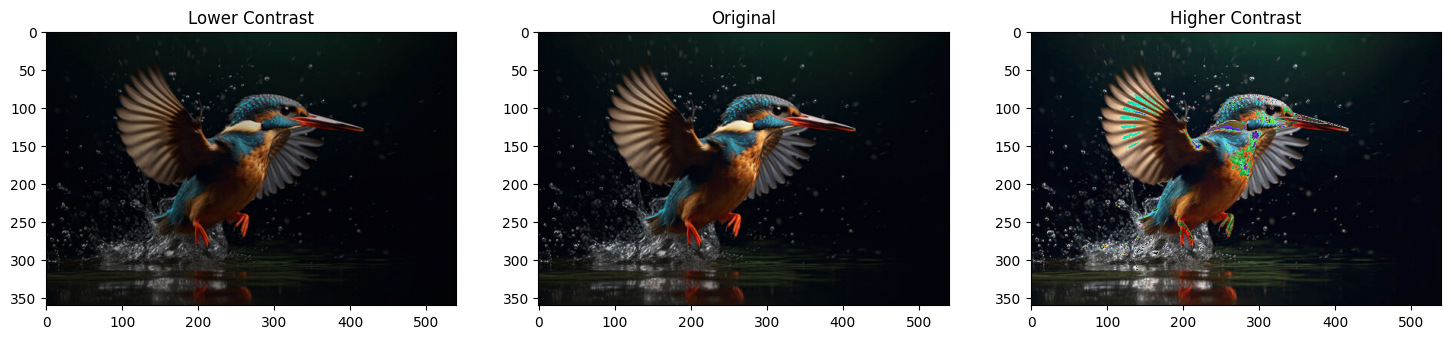

In [14]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.5

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast")
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original")
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast")

Text(0.5, 1.0, 'Higher Contrast')

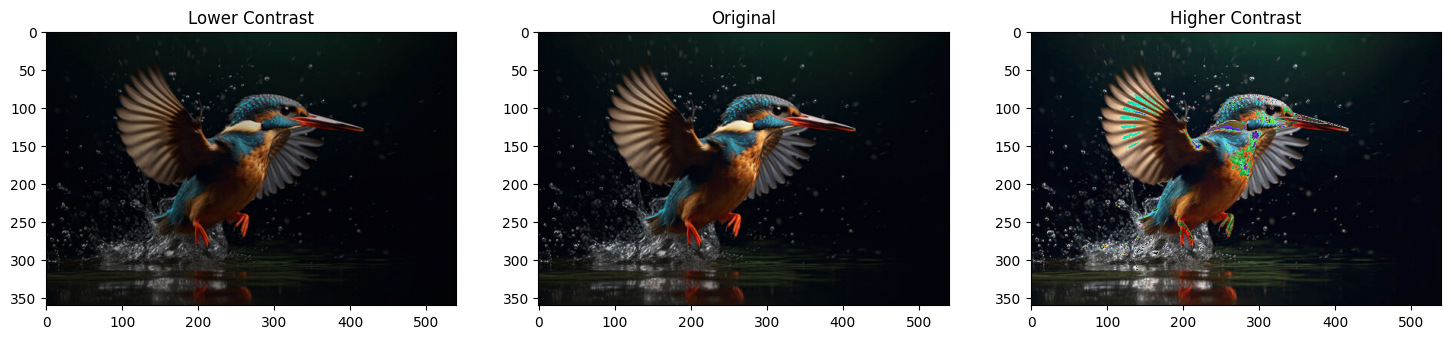

In [15]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.5

img_rgb_lower = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2), 0, 255))

plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast")
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original")
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast")

(1120, 1500)


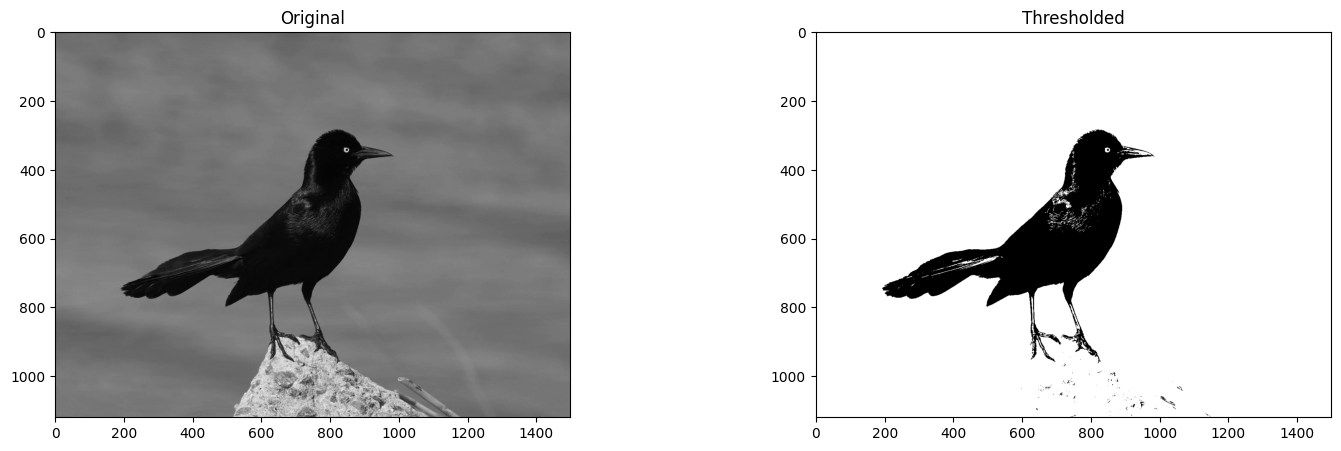

In [60]:
img_read = cv2.imread('male_bird.png', cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 60, 255, cv2.THRESH_BINARY)
plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")

print(img_thresh.shape)

Text(0.5, 1.0, 'Thresholded (adaptive)')

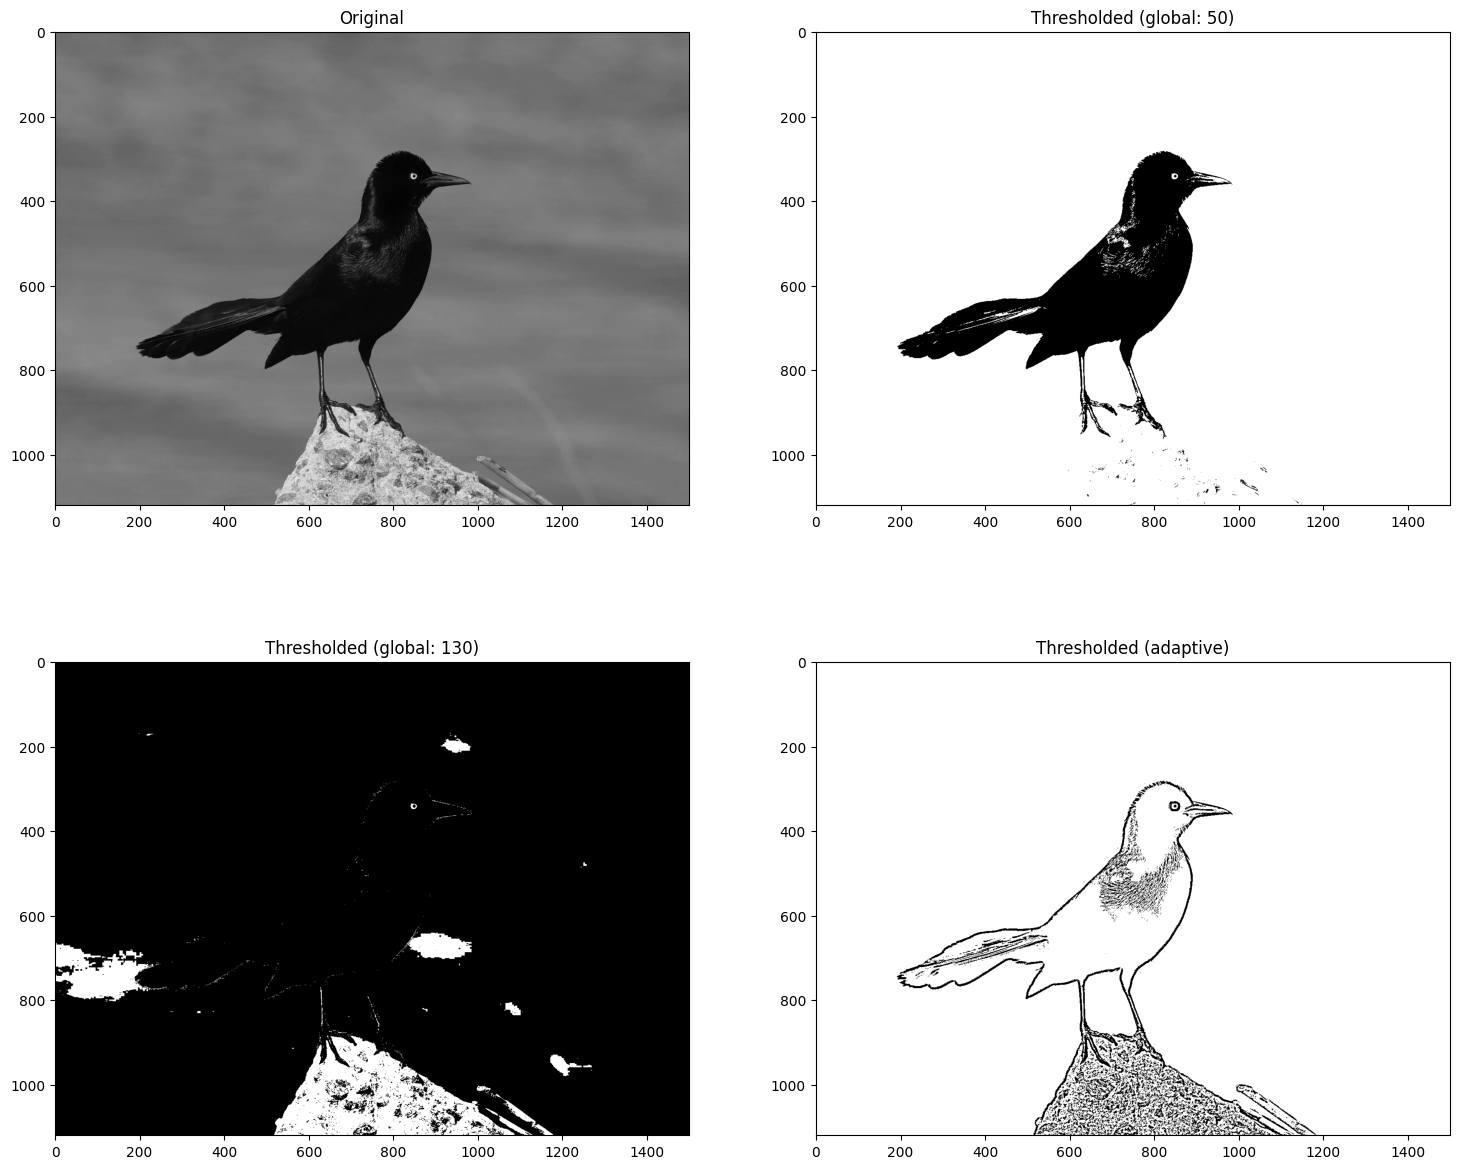

In [61]:
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 60, 255, cv2.THRESH_BINARY)
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original")
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)")
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)")
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)")


(900, 1800, 3)


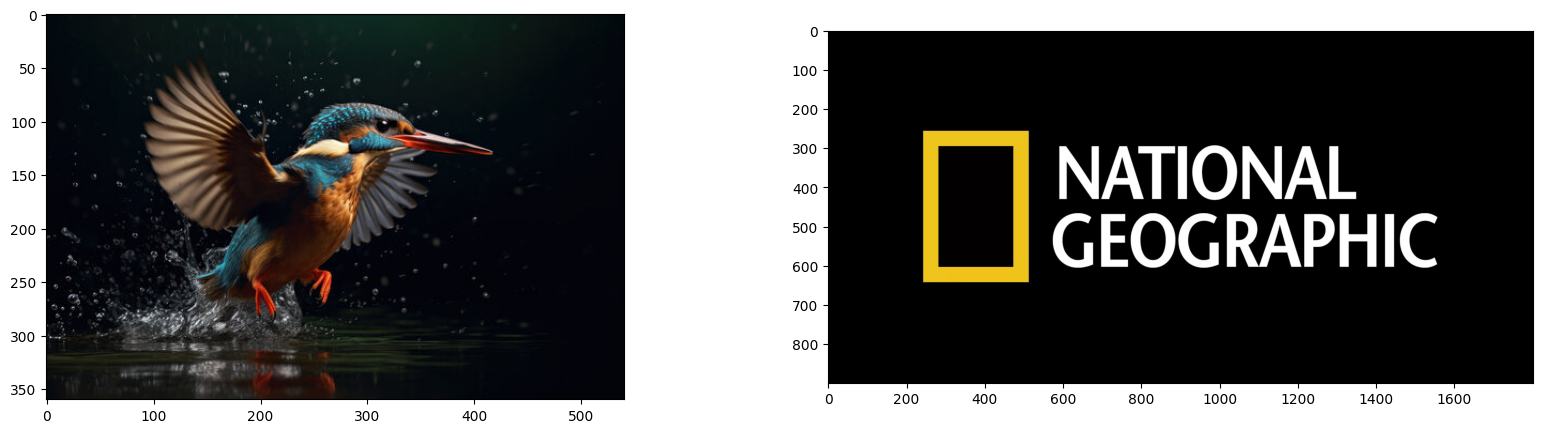

In [65]:
img_logo_bgr = cv2.imread('natgeo.png', cv2.IMREAD_COLOR)
img_logo_rgb = cv2.cvtColor(img_logo_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rgb)
plt.subplot(122);plt.imshow(img_logo_rgb)
print(img_logo_rgb.shape)

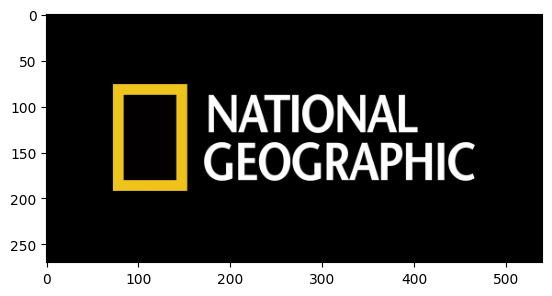

In [94]:
# Method 2: Using 'dsize'
desired_width = img_rgb.shape[1]
aspect_ratio = desired_width / img_logo_rgb.shape[1]
desired_height = int(img_logo_rgb.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_img_logo_rgb = cv2.resize(img_logo_rgb, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_img_logo_rgb)

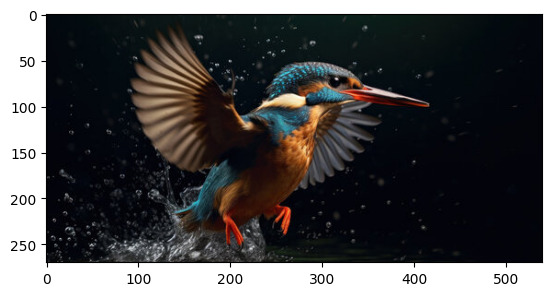

In [106]:
resized_img_rgb = img_rgb[30:resized_img_logo_rgb.shape[0]+30, 0:resized_img_logo_rgb.shape[1]]
plt.imshow(resized_img_rgb)

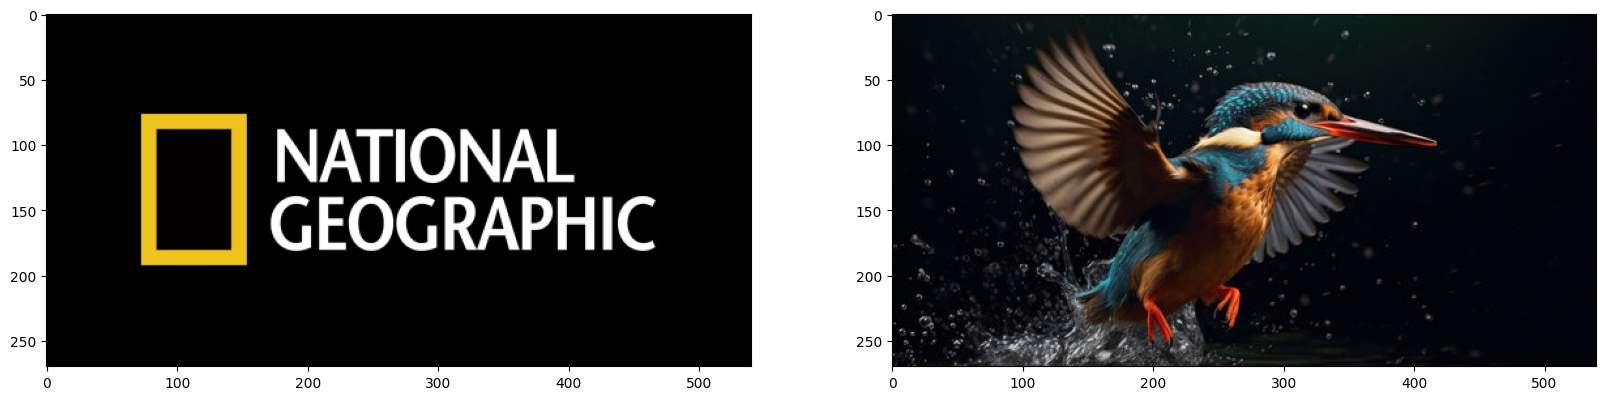

In [107]:
plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(resized_img_logo_rgb)
plt.subplot(122);plt.imshow(resized_img_rgb)

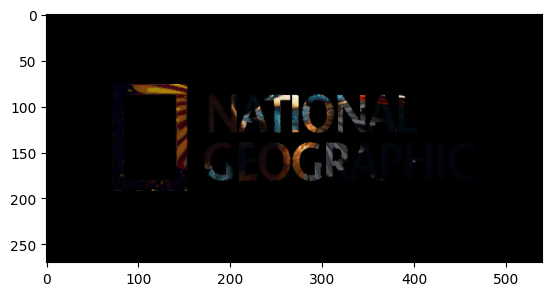

In [108]:
res = cv2.bitwise_and(resized_img_logo_rgb, resized_img_rgb, mask=None)
plt.imshow(res)

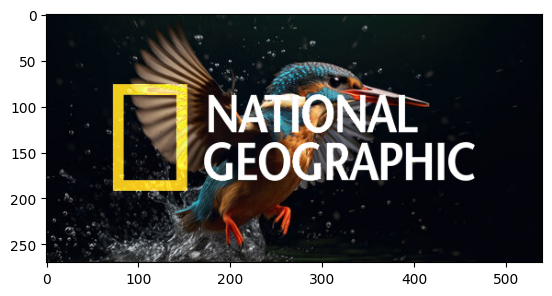

In [125]:
res = cv2.bitwise_or(resized_img_logo_rgb, resized_img_rgb, mask=None)
cv2.imwrite("natgeo_logo_final.png", res[:, :, ::-1])
plt.imshow(res)

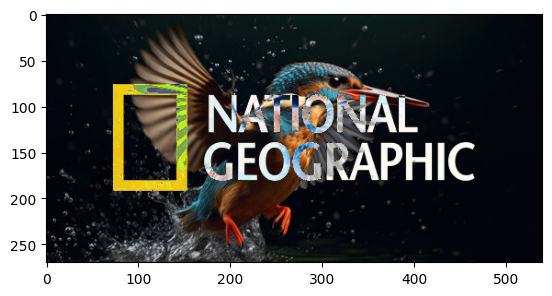

In [126]:
res = cv2.bitwise_xor(resized_img_logo_rgb, resized_img_rgb, mask=None)
cv2.imwrite("natgeo_logo_final_inverted.png", res[:, :, ::-1])
plt.imshow(res)